In [50]:

import yaml
import os

from numpy import *
import luxeics
import h5py

from scipy.interpolate import interp2d,RectBivariateSpline

import matplotlib.pyplot as plt

import luxeics


def Photon_density(xoffset,yoffset,X1,X2,baseline,spotsize,sigmaT,W,path):
    
    
    Area=pi*spotsize**2

    selector1 = sqrt(xoffset**2+yoffset**2) < spotsize
    selector2 = sqrt((xoffset+X1)**2+(yoffset+X2)**2) < spotsize


    print ( f'IP-laser spot size: {spotsize:.2f} micron')
    print ( f'baseline          : {baseline/1e6:.2f} metres')
    print ('-'*42)

    print (f'photons in spot')
    print (f'macrophoton weight               : {amax(W):.4g}')
    print ( 'macrophotons, zero   source size :',sum( selector1 ) )
    print ( 'macrophotons, finite source size :',sum( selector2 ) )
    print ( 'photon weight, zero   source size:',sum(W[selector1 ] ) )
    print ( 'photon weight, finite source size:',sum(W[selector2 ] ) )
    
    P1=sum(W[selector1 ] )/Area
    P2=sum(W[selector2 ] )/Area
    print ( f'Photon density, zero   source size:',P1)
    print ( f'Photon density, finite source size:',P2)
    
    print (' ######################################### '  )
    print ('                           '  )
    plt.figure(figsize=(14,6))

    ax1=plt.subplot(121,aspect=1)
    plt.scatter(xoffset, yoffset, color='r',marker='.',lw=0,s=W )
    plt.xlim(-2*spotsize,2*spotsize)
    plt.ylim(-2*spotsize,2*spotsize)
   
    plt.xlabel(r'$x$ (micron)')
    plt.ylabel(r'$y$ (micron)');
    plt.title(f'zero source size, Photon density:{round(P1,2)} micron^(-2)')


    ax2=plt.subplot(122,aspect=1)

    # plot(X1+xoffset, X2+yoffset, color='m', marker=',',lw=0);





    plt.scatter(X1+xoffset, X2+yoffset, color='m', marker='.',lw=0,s=W);

    plt.xlim(-2*spotsize,2*spotsize)
    plt.ylim(-2*spotsize,2*spotsize)
    
    plt.xlabel(r'$x$ (micron)')
    plt.ylabel(r'$y$ (micron)');
    plt.title(f'Finite source size, Photon density:{round(P2,2)} micron^(-2)')

    ax1.add_patch(plt.Circle((0,0),spotsize,color='C0',fill=False))
    ax2.add_patch(plt.Circle((0,0),spotsize,color='C0',fill=False))


    plt.suptitle(f' sigmaT :{sigmaT} micron ; spotsize:{spotsize} micron')
    plt.savefig(f'{path}\photon_spectrum_at_focus_{sigmaT}_{spotsize}.png',dpi=200)
    
    return(P1,P2)
                                      
    
                                   
def run(spotsize1,spotsize2,input_filename,path):
    

    
    
    with h5py.File(input_filename + '.h5' ,'r') as ff:
    #     omega      = ff['final-state/spectrum/omega'][:]/1e9
    #     theta      = ff['final-state/spectrum/theta'][:]*1e6
    #     spectrum   = ff['final-state/spectrum/spectrum'][:]

        K0,K1,K2,K3  = ff['final-state/photon/momentum'][:].T
        X0,X1,X2,X3  = ff['final-state/photon/position'][:].T
        W            = ff['final-state/photon/weight'  ][:]

        P0,P1,P2,P3  = ff['final-state/electron/momentum'][:].T
    #     X0,X1,X2,X3  = ff['final-state/photon/position'][:].T
    #     We            = ff['final-state/photon/weight'  ][:]
    with open( input_filename + '.yml', 'r' ) as stream:
        input_dict = yaml.load(stream, Loader=yaml.SafeLoader)

        mode             = input_dict['control']['mode']


        beam_charge      = float( input_dict['beam']['beam_charge'])
        number_electrons = int( beam_charge / 1.60217653e-19)

    #     sampling         = input_dict['control']['sampling']
        sampling = mode

        w0               = float(input_dict['laser']['w0'])
        omega0           = float(input_dict['laser']['omega0'])
        gamma            = float(input_dict['beam']['gamma'])
        Xr               = 4*gamma*omega0/511*10**(-3)
        energyspread     = float(input_dict['beam']['energyspread'])
        sigmaT   = float(input_dict['beam']['sigmaT'])
#     print (f'beam charge                              : {beam_charge*1e12:.24} pC')
#     print (f'number of beam electrons                 : {number_electrons:.3e}')
#     print ('-'*42)
#     print (f'{sampling} sampling:')
#     print (f'max  single photon weight                : {amax(W):.4g}')
#     print (f'mean single photon weight                : {mean(W):.4g}')
#     print (f'total photon weight                      : {sum(W):.4g}')
#     print (f'total photon weight per incident electron: {sum(W)/number_electrons:.4g}')
#     print (f'total macro photon number                : {len(W)}')
#     print ('-'*42)
#     print(f' Frequency (Laser) :  {omega0}'  )
#     print(f'Recoil Factor:{Xr}')
#     print (' ######################################### '  )
#     print ('                           '  )
    baseline = 7.5e6

    thetax=K1/K3
    thetay=K2/K3

     

    xoffset = thetax * baseline
    yoffset = thetay * baseline
    Pd=zeros(4)
    Pd[0],Pd[1]=Photon_density(xoffset,yoffset,X1,X2,baseline,spotsize1,sigmaT,W,path)
    Pd[2],Pd[3]=Photon_density(xoffset,yoffset,X1,X2,baseline,spotsize2,sigmaT,W,path)
    
    
    
    return(Pd)

In [ ]:
import os
  
# Directory
directory = "GeeksforGeeks"
  
# Parent Directory path
parent_dir = "D:/Pycharm projects/"
  
# Path
path = os.path.join(parent_dir, directory)
  
# Create the directory
# 'GeeksForGeeks' in
# '/home / User / Documents'
os.mkdir(path)
print("Directory '% s' created" % directory)

{'beam': {'beam_charge': '100e-12', 'emittance': 1.5, 'energyspread': '1e-3', 'gamma': 32289.62818003914, 'sigmaL': 20.0, 'sigmaT': 5, 'theta': 0.0}, 'control': {'beam': {'Nemit': 30, 'Nenergy': 7}, 'energyaverage': False, 'laser': {'sigma_crit': 500.0, 'sigma_rescale': False}, 'mode': 'full', 'name': 'C:\\Users\\Dupish\\Documents\\GitHub\\luxeics\\Photon_Density\\Run2_24_9\\SigmaT5', 'radiation': 'KN', 'sample_electrons': '1e2', 'sampling': 'rejection'}, 'detector': {'omega': ['5.0e9', '9.2e9', 300], 'pdim': 2, 'phi': 0.0, 'theta': [0, '15e-6', 110]}, 'laser': {'Tpulse': 100.0, 'a0': 0.1, 'omega0': 4.1, 'pol': 0.7853981633974483, 'pulse': 'cos2', 'w0': 25.0}}
>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 247435.0863936534
   number photons     : 1
   total photon number: 1
IP-laser spot size: 3.00 micron
baseline          : 7.50 m

IP-laser spot size: 10.00 micron
baseline          : 7.50 metres
------------------------------------------
photons in spot
macrophoton weight               : 141.7
macrophotons, zero   source size : 1
macrophotons, finite source size : 0
photon weight, zero   source size: 141.68485016091572
photon weight, finite source size: 0.0
Photon density, zero   source size: 0.45099688528688514
Photon density, finite source size: 0.0
 ######################################### 
                           
{'beam': {'beam_charge': '100e-12', 'emittance': 1.5, 'energyspread': '1e-3', 'gamma': 32289.62818003914, 'sigmaL': 20.0, 'sigmaT': 30, 'theta': 0.0}, 'control': {'beam': {'Nemit': 30, 'Nenergy': 7}, 'energyaverage': False, 'laser': {'sigma_crit': 500.0, 'sigma_rescale': False}, 'mode': 'full', 'name': 'C:\\Users\\Dupish\\Documents\\GitHub\\luxeics\\Photon_Density\\Run2_24_9\\SigmaT30', 'radiation': 'KN', 'sample_electrons': '1e2', 'sampling': 'rejection'}, 'detector': {'omega': ['5.0e9', '9.2e9

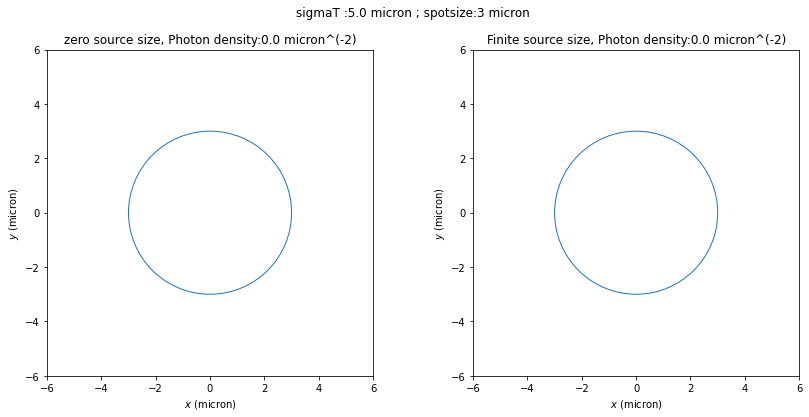

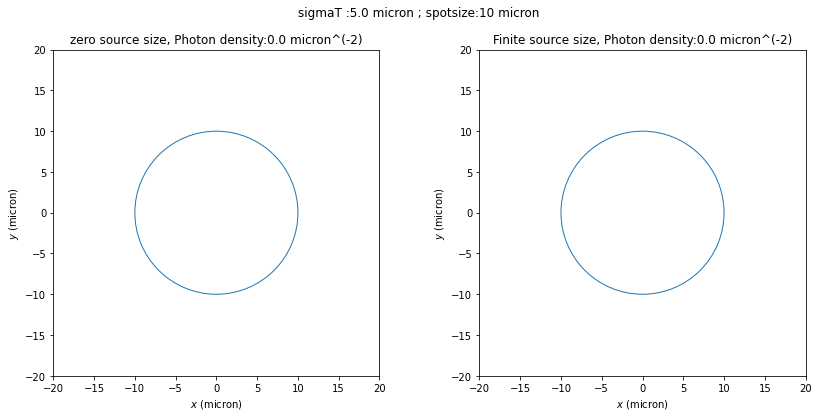

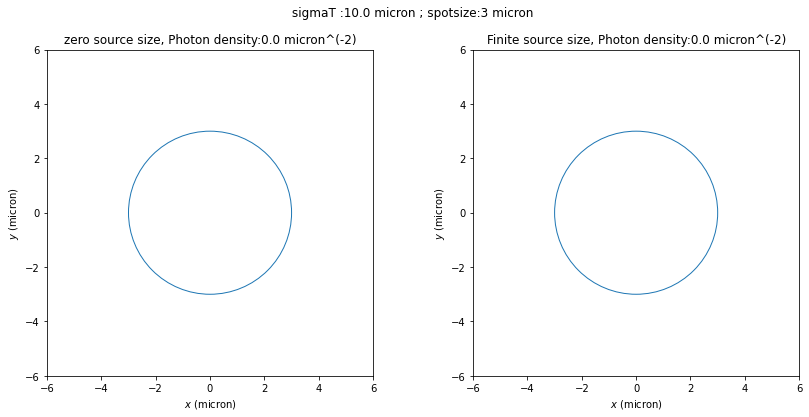

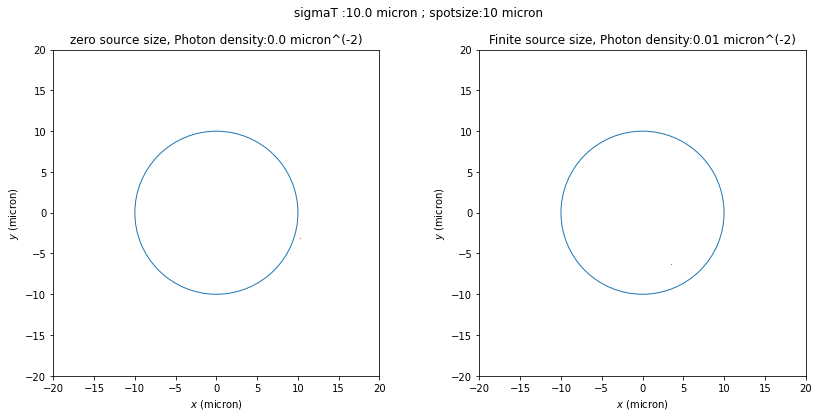

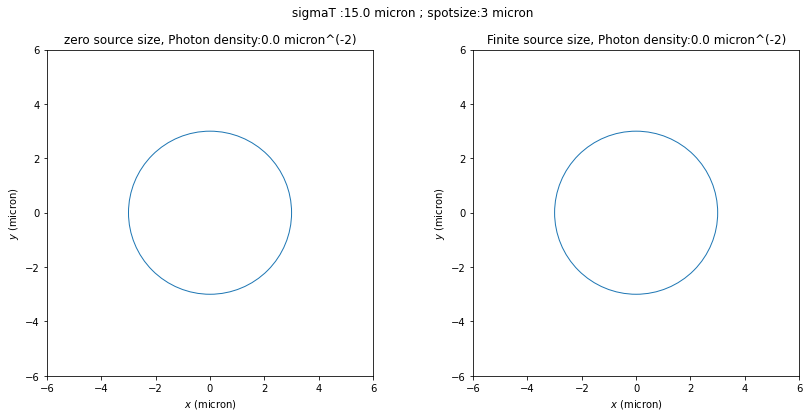

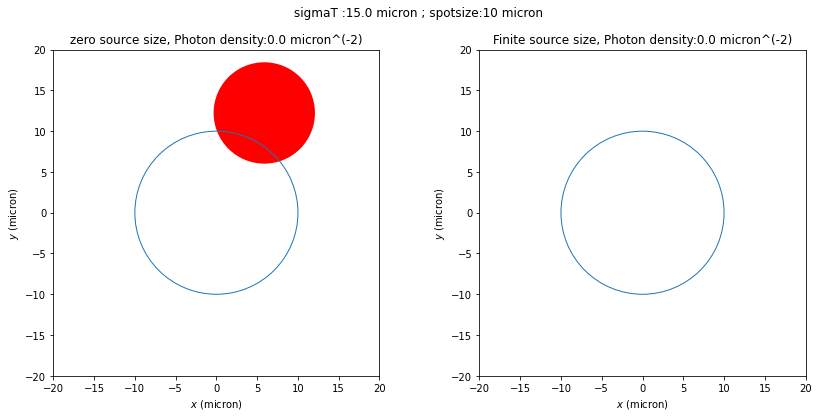

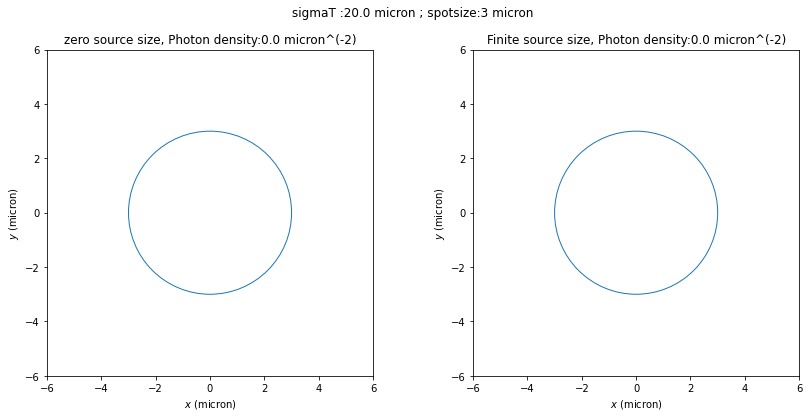

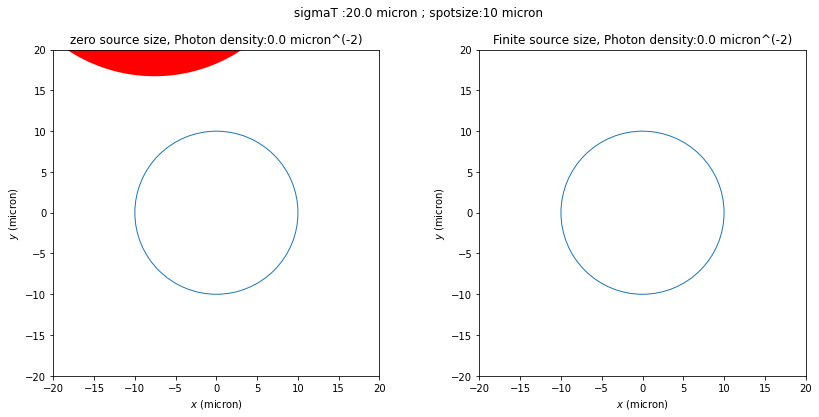

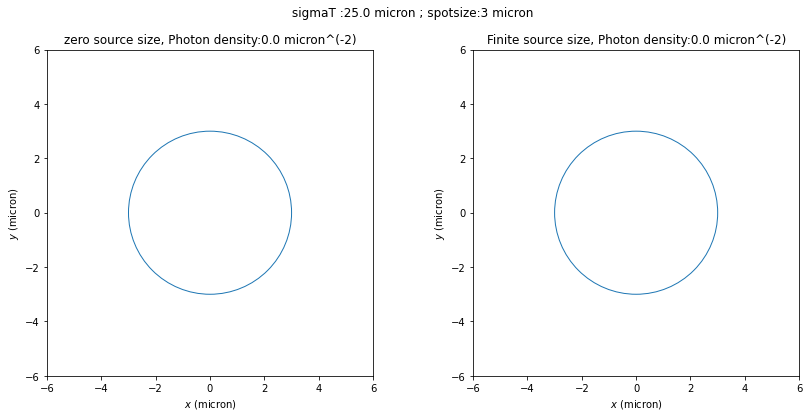

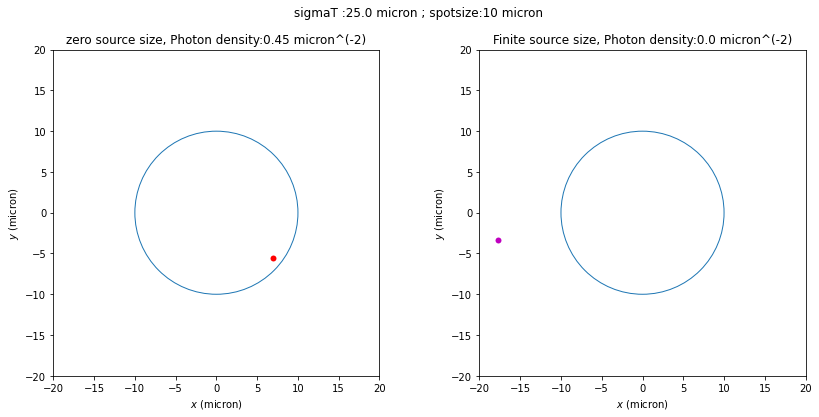

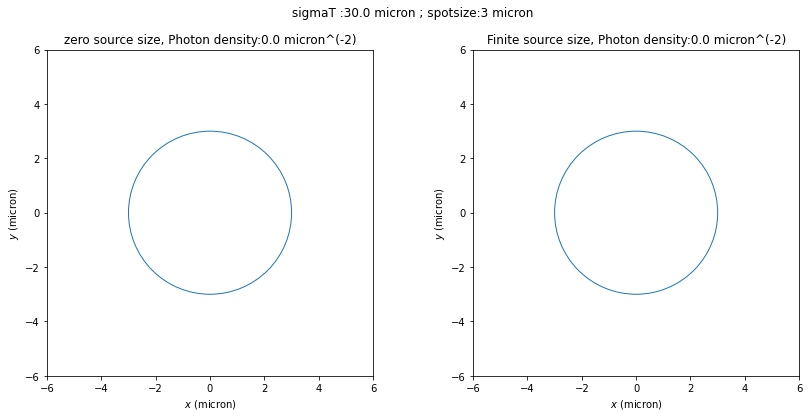

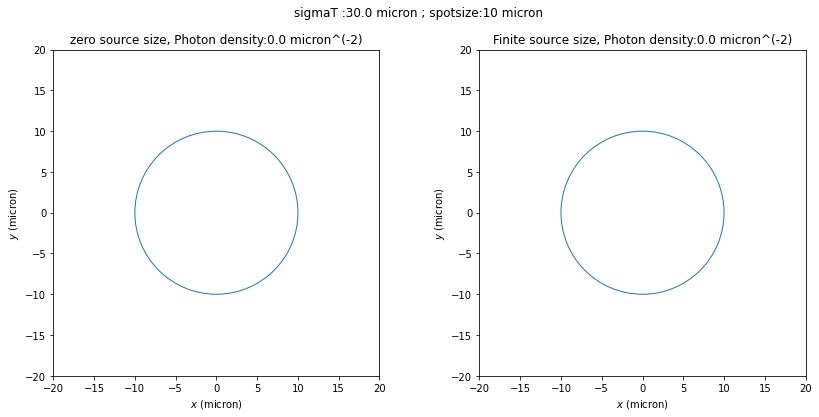

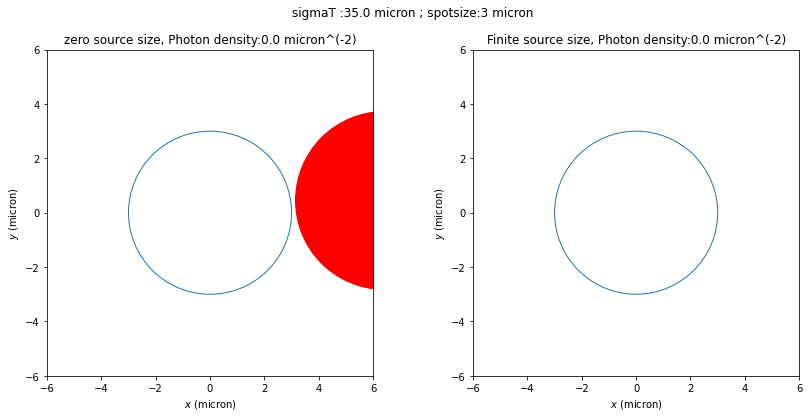

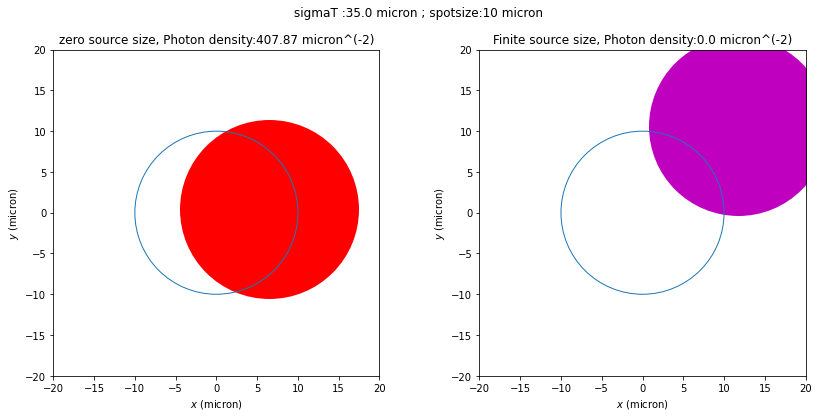

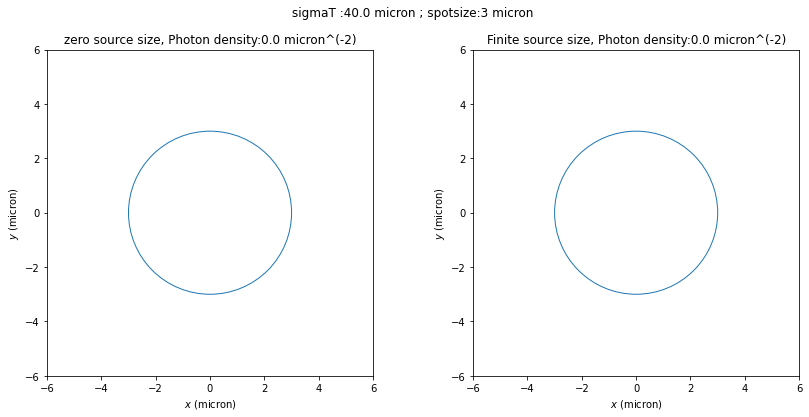

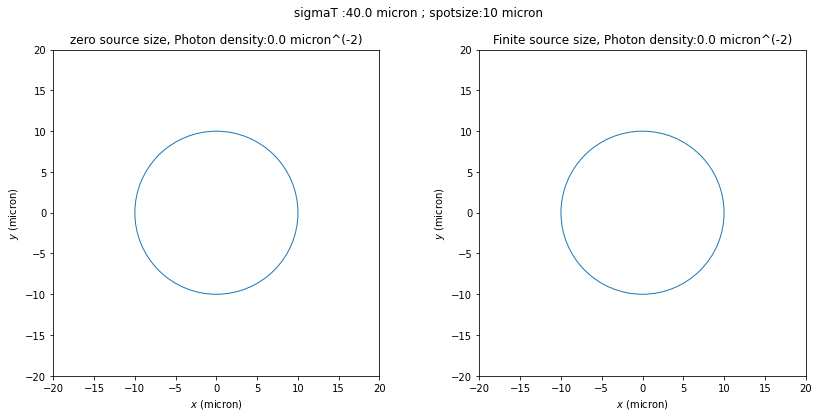

In [53]:


input_filename = "New"
n=8
sigma=zeros(n)
Pd=ones((n,4))
spotsize1=3
spotsize2=10
directory = "Run2_24_9"
parent_dir = f"{os. getcwd()}\Photon_Density"
path = os.path.join(parent_dir, directory)
os.mkdir(path)

for i in range(n):
    with open( input_filename+'.yml', 'r' ) as stream:
        input_dict = yaml.load(stream, Loader=yaml.SafeLoader)
        sigma1= 5+i*5
        
        input_dict['beam']['sigmaT']=sigma1
        input_dict['control']['name']=f'{path}\SigmaT{sigma1}'
        input_filename1 = f'SigmaT{sigma1}'
        

    with open(      f'{path}\SigmaT{sigma1}'+'.yml', 'w') as file:
        documents = yaml.dump(input_dict, file)
    
    # import matplotlib.pyplot as plt

    sigma[i]=sigma1
    

    with open( f'{path}\SigmaT{sigma1}'+'.yml', 'r' ) as stream:
        input_dict = yaml.load(stream, Loader=yaml.SafeLoader)

    print (input_dict)

    

    luxeics.main_program( f'{path}\SigmaT{sigma1}'+'.yml' )
    
    Pd[i]=run(spotsize1,spotsize2,f'{path}\SigmaT{sigma1}',path)


In [3]:
print(sigma)

[ 5. 10. 15. 20. 25. 30. 35. 40.]


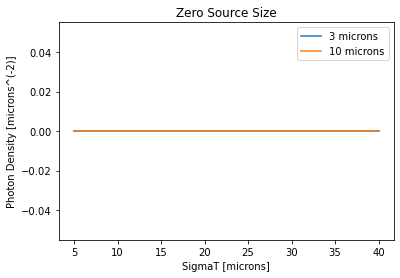

In [46]:
plt.plot(sigma,Pd[:,0],label=f'{spotsize1} microns')
plt.plot(sigma,Pd[:,1],label=f'{spotsize2} microns')
plt.xlabel('SigmaT [microns]')
plt.ylabel(r'Photon Density [microns^(-2)]')
plt.legend()
plt.title('Zero Source Size')
plt.savefig(f'{path}\PhotonDensity_vs_sigmaT_Zero.png',dpi=200)

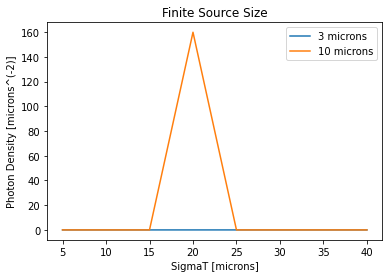

In [47]:
plt.plot(sigma,Pd[:,2],label=f'{spotsize1} microns')
plt.plot(sigma,Pd[:,3],label=f'{spotsize2} microns')
plt.xlabel('SigmaT [microns]')
plt.ylabel('Photon Density [microns^(-2)]')
plt.title('Finite Source Size')
plt.legend()
plt.savefig(f'{path}\PhotonDensity_vs_sigmaT_Finite.png',dpi=200)

In [55]:
import pandas as pd
import numpy as np
import os
Data=np.zeros((n,3))
Data[:,0]=sigma
Data[:,1]=Pd[:,1]
Data[:,2]=Pd[:,3]
df=pd.DataFrame(Data)

List=["Sigma","3 microns","10 microns"]
df.to_csv(f'{path}\Photon_Density.txt',header=List , index=None, sep="\t", mode='w')



print(df)

      0    1         2
0   5.0  0.0  0.000000
1  10.0  0.0  0.007419
2  15.0  0.0  0.000000
3  20.0  0.0  0.000000
4  25.0  0.0  0.000000
5  30.0  0.0  0.000000
6  35.0  0.0  0.000000
7  40.0  0.0  0.000000


In [15]:
C:\Users\Dupish\Documents\GitHub\luxeics

[[ 5.         30.37433158 27.73031401 33.15177454 32.02084234]
 [10.         28.48382479 31.62488365 29.28138274 28.13436904]
 [15.         19.27502604 20.20369542 20.70407494 20.32439451]
 [20.         12.04539114 15.33285258 13.78699873 13.88353497]
 [25.         11.18655682 10.11535704 10.9399761  10.86778589]
 [30.          7.36849069  8.57605758  7.25031967  7.02678979]
 [35.          4.7655146   6.32635146  6.13104475  5.63244088]
 [40.          4.40264119  4.76720131  4.55929973  4.55888354]]


In [13]:
print(Pd)

[[30.37433158 27.73031401 33.15177454 32.02084234]
 [28.48382479 31.62488365 29.28138274 28.13436904]
 [19.27502604 20.20369542 20.70407494 20.32439451]
 [12.04539114 15.33285258 13.78699873 13.88353497]
 [11.18655682 10.11535704 10.9399761  10.86778589]
 [ 7.36849069  8.57605758  7.25031967  7.02678979]
 [ 4.7655146   6.32635146  6.13104475  5.63244088]
 [ 4.40264119  4.76720131  4.55929973  4.55888354]]
